## NLP Topic Modeling Exercise

In [1]:
# import TfidfVectorizer and CountVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# import fetch_20newsgroups from sklearn.datasets
from sklearn.datasets import fetch_20newsgroups

# import NMF and LatentDirichletAllocation from sklearn
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [2]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

* create a variable called `'no_features'` and set its value to 100.

In [3]:
no_features = 100

* create a variable `'no_topics'` and set its value to 100

In [4]:
no_topics = 5

In [5]:
import re #regular expression
import spacy
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [6]:
nlp = spacy.load("en_core_web_sm")

def normalize_text(documents, 
                   min_token_len=2, 
                   irrelevant_pos=['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE']):
    """
    Given text, min_token_len, and irrelevant_pos carry out preprocessing of the text 
    and return a preprocessed string. 
    
    Keyword arguments:
    documents -- (np.array[str]) the list of documents to be preprocessed
    min_token_len -- (int) min_token_length required
    irrelevant_pos -- (list) a list of irrelevant pos tags
    
    Returns: np.array[str] the normalized documents
    """
    normalized_documents = []
    
    for text in documents:
        # Remove Emails
        text = re.sub(r'\S*@\S*\s?', '', text)

        # Remove extra space characters
        text = re.sub(r'\s+', ' ', text)

        # Remove distracting characters
        text = re.sub(r'''[\*\~]+''', "", text)

        doc = nlp(text) #covert text into spacy object
        clean_text = []

        for token in doc:
            if (token.is_stop == False # Check if it's not a stopword
                and token.is_alpha # Check if it's an alphanumerics char
                and len(token) > min_token_len # Check if the word meets minimum threshold
                and token.pos_ not in irrelevant_pos): # Check if the POS is in the acceptable POS tags
                lemma = token.lemma_ # Take the lemma of the word
                clean_text.append(lemma)
                
        clean_text = ' '.join(clean_text) #merge list of tokens back into string
        normalized_documents.append(clean_text) #append to list of normalized documents
        
    normalized_documents = np.array(normalized_documents) #convert list of normalized documents into numpy array
    return normalized_documents

# Create a Transformer from the function so that we can use it in a Pipeline
normalizer = FunctionTransformer(normalize_text)

# Show an example of the normalizer in action
print(f'Prior to normalization:\n{documents[0]}')
print(f'After normalization:\n{normalizer.transform(documents[0:1])}')

Prior to normalization:
Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.

After normalization:
['sure story nad biased disagree statement Media ruin Israels reputation rediculous media pro israeli 

In [7]:
normalized_documents = normalize_text(documents)

## NMF

* instantiate a TfidfVectorizer with the following parameters:


    * max_df = 0.95
    * min_df = 2
    * max_features = no_features
    * stop_words = 'english'

In [8]:
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')

* use fit_transform method of TfidfVectorizer to transform the documents

In [9]:
docs_transformed = vectorizer.fit_transform(normalized_documents)

* get the features names from TfidfVectorizer

In [10]:
vectorizer.get_feature_names_out()

array(['ask', 'available', 'bad', 'base', 'believe', 'bit', 'book', 'car',
       'card', 'case', 'change', 'chip', 'come', 'control', 'day',
       'different', 'drive', 'end', 'example', 'fact', 'file', 'follow',
       'game', 'god', 'good', 'government', 'great', 'group', 'gun',
       'happen', 'hear', 'help', 'high', 'image', 'include',
       'information', 'key', 'know', 'law', 'let', 'life', 'like', 'line',
       'list', 'little', 'look', 'lot', 'mail', 'make', 'man', 'mean',
       'need', 'new', 'note', 'number', 'old', 'order', 'people', 'place',
       'play', 'point', 'post', 'power', 'problem', 'program', 'provide',
       'question', 'read', 'reason', 'right', 'run', 'say', 'second',
       'send', 'set', 'software', 'source', 'space', 'start', 'state',
       'support', 'sure', 'team', 'tell', 'thank', 'thing', 'think',
       'time', 'true', 'try', 'use', 'version', 'want', 'way', 'window',
       'word', 'work', 'world', 'write', 'year'], dtype=object)

* instantiate NMF and fit transformed data

In [11]:
nmf = NMF(n_components=no_topics)

In [12]:
nmf.fit_transform(docs_transformed)

array([[0.04077528, 0.00967565, 0.01538472, 0.00722038, 0.00632853],
       [0.02212421, 0.05242833, 0.02302209, 0.00433472, 0.00508043],
       [0.03313347, 0.02534092, 0.01585939, 0.05562997, 0.        ],
       ...,
       [0.00296238, 0.03749581, 0.00721967, 0.        , 0.        ],
       [0.        , 0.07735022, 0.        , 0.04309089, 0.        ],
       [0.01324735, 0.01233572, 0.15934809, 0.02220287, 0.        ]])

## LDA w/ Sklearn

* instantiate a CountVectorizer with following parameters:


    * max_df = 0.95
    * min_df = 2
    * max_features = no_features
    * stop_words = 'english'

In [13]:
vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, max_features=no_features, stop_words='english')

* use fit_transform method of CountVectorizer to transform documents

In [14]:
docs_transformed = vectorizer.fit_transform(normalized_documents)

* get the features names from TfidfVectorizer

In [15]:
vectorizer.get_feature_names_out()

array(['ask', 'available', 'bad', 'base', 'believe', 'bit', 'book', 'car',
       'card', 'case', 'change', 'chip', 'come', 'control', 'day',
       'different', 'drive', 'end', 'example', 'fact', 'file', 'follow',
       'game', 'god', 'good', 'government', 'great', 'group', 'gun',
       'happen', 'hear', 'help', 'high', 'image', 'include',
       'information', 'key', 'know', 'law', 'let', 'life', 'like', 'line',
       'list', 'little', 'look', 'lot', 'mail', 'make', 'man', 'mean',
       'need', 'new', 'note', 'number', 'old', 'order', 'people', 'place',
       'play', 'point', 'post', 'power', 'problem', 'program', 'provide',
       'question', 'read', 'reason', 'right', 'run', 'say', 'second',
       'send', 'set', 'software', 'source', 'space', 'start', 'state',
       'support', 'sure', 'team', 'tell', 'thank', 'thing', 'think',
       'time', 'true', 'try', 'use', 'version', 'want', 'way', 'window',
       'word', 'work', 'world', 'write', 'year'], dtype=object)

* instantiate LatentDirichletAllocation and fit transformed data 

In [16]:
lda = LatentDirichletAllocation(n_components=no_topics)

In [17]:
lda.fit(docs_transformed)

LatentDirichletAllocation(n_components=5)

* create a function `display_topics` that is able to display the top words in a topic for different models

In [18]:
from matplotlib import pyplot as plt
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [28]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    


* display top 10 words from each topic from NMF model

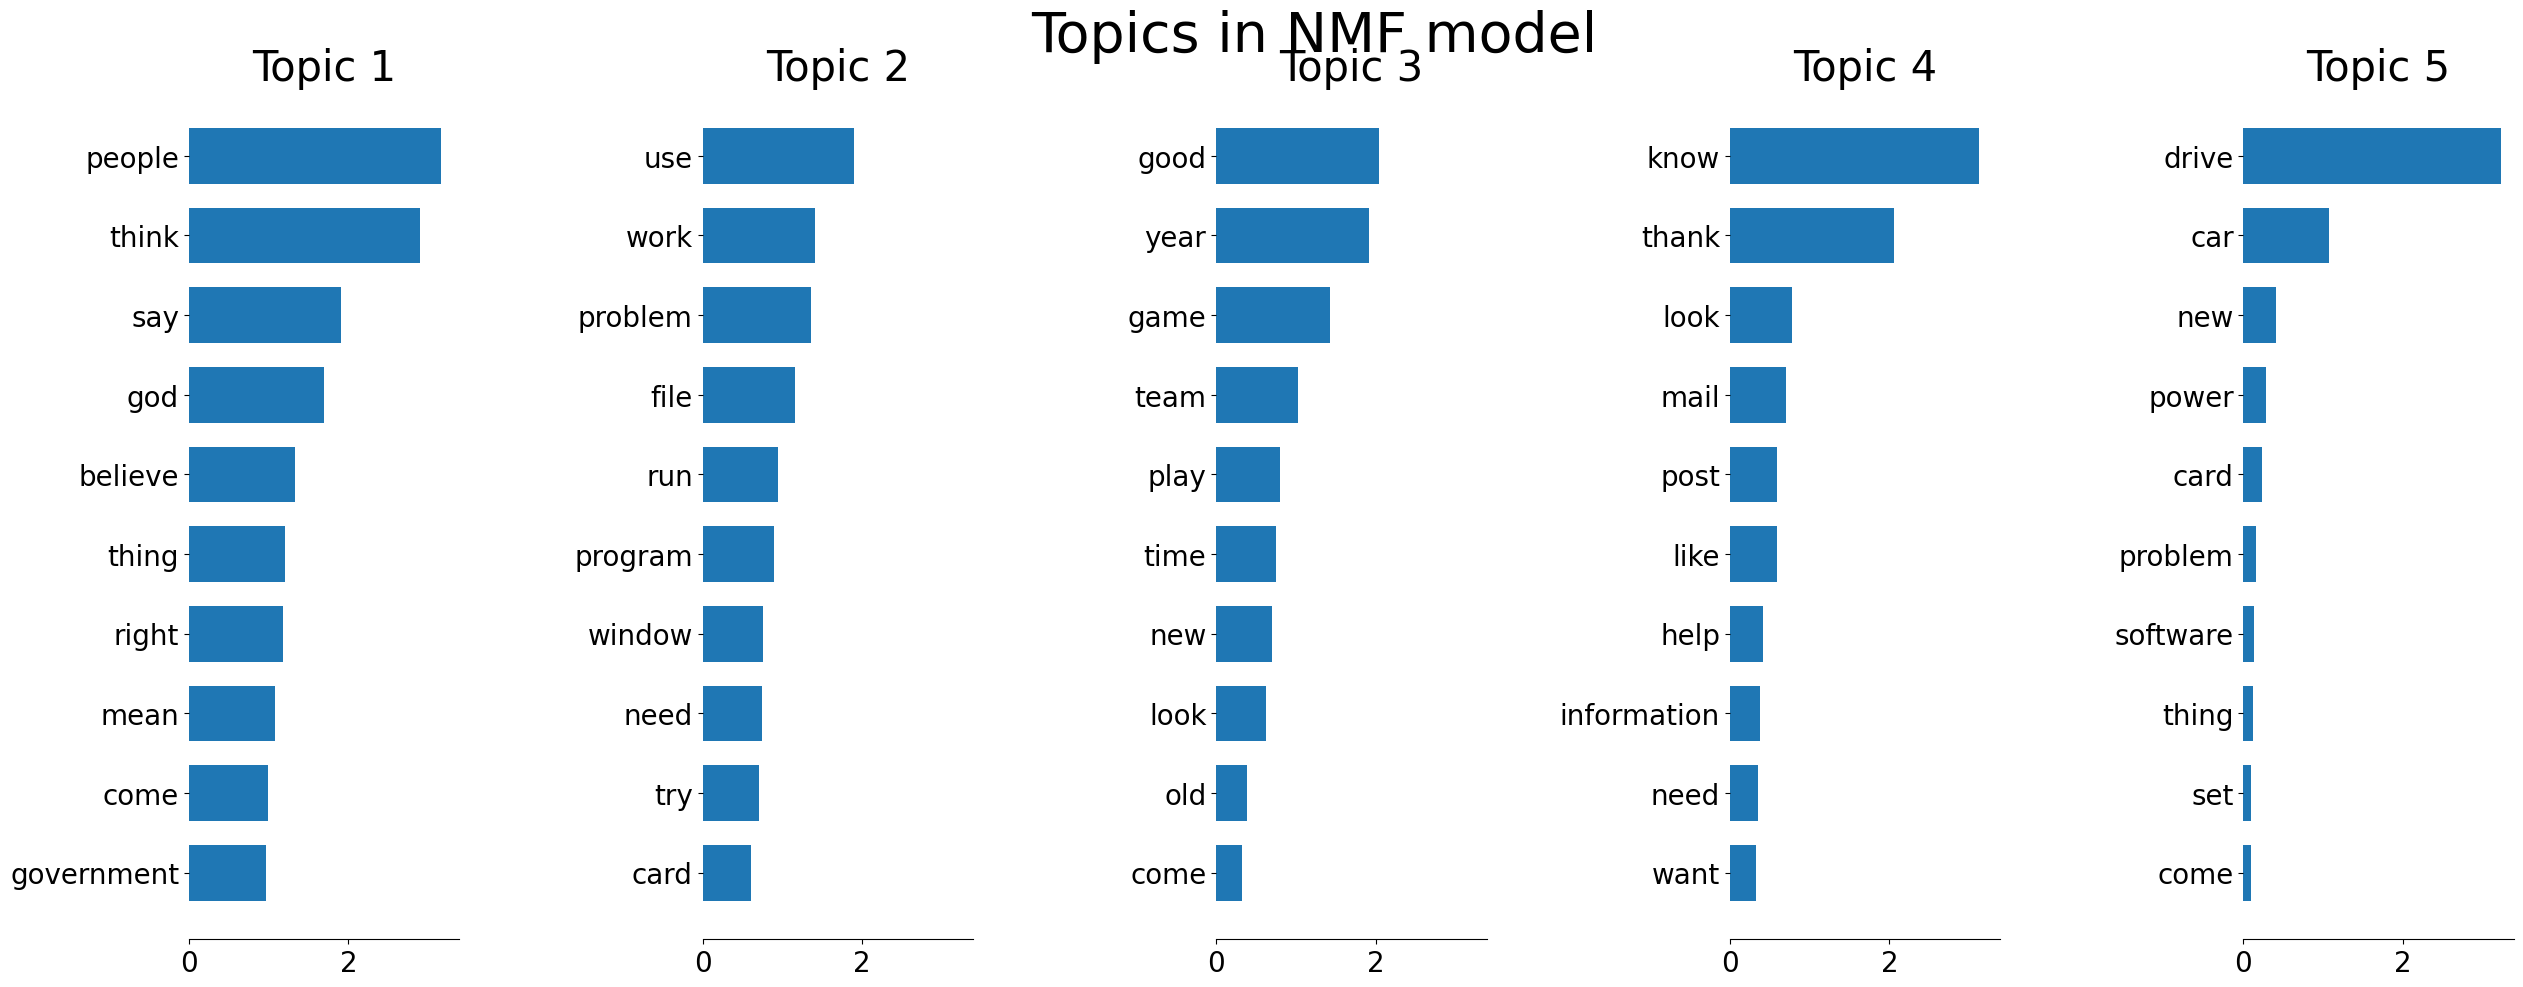

In [32]:
plot_top_words(nmf, vectorizer.get_feature_names_out(), 10, 'Topics in NMF model')

* display top 10 words from each topic from LDA model

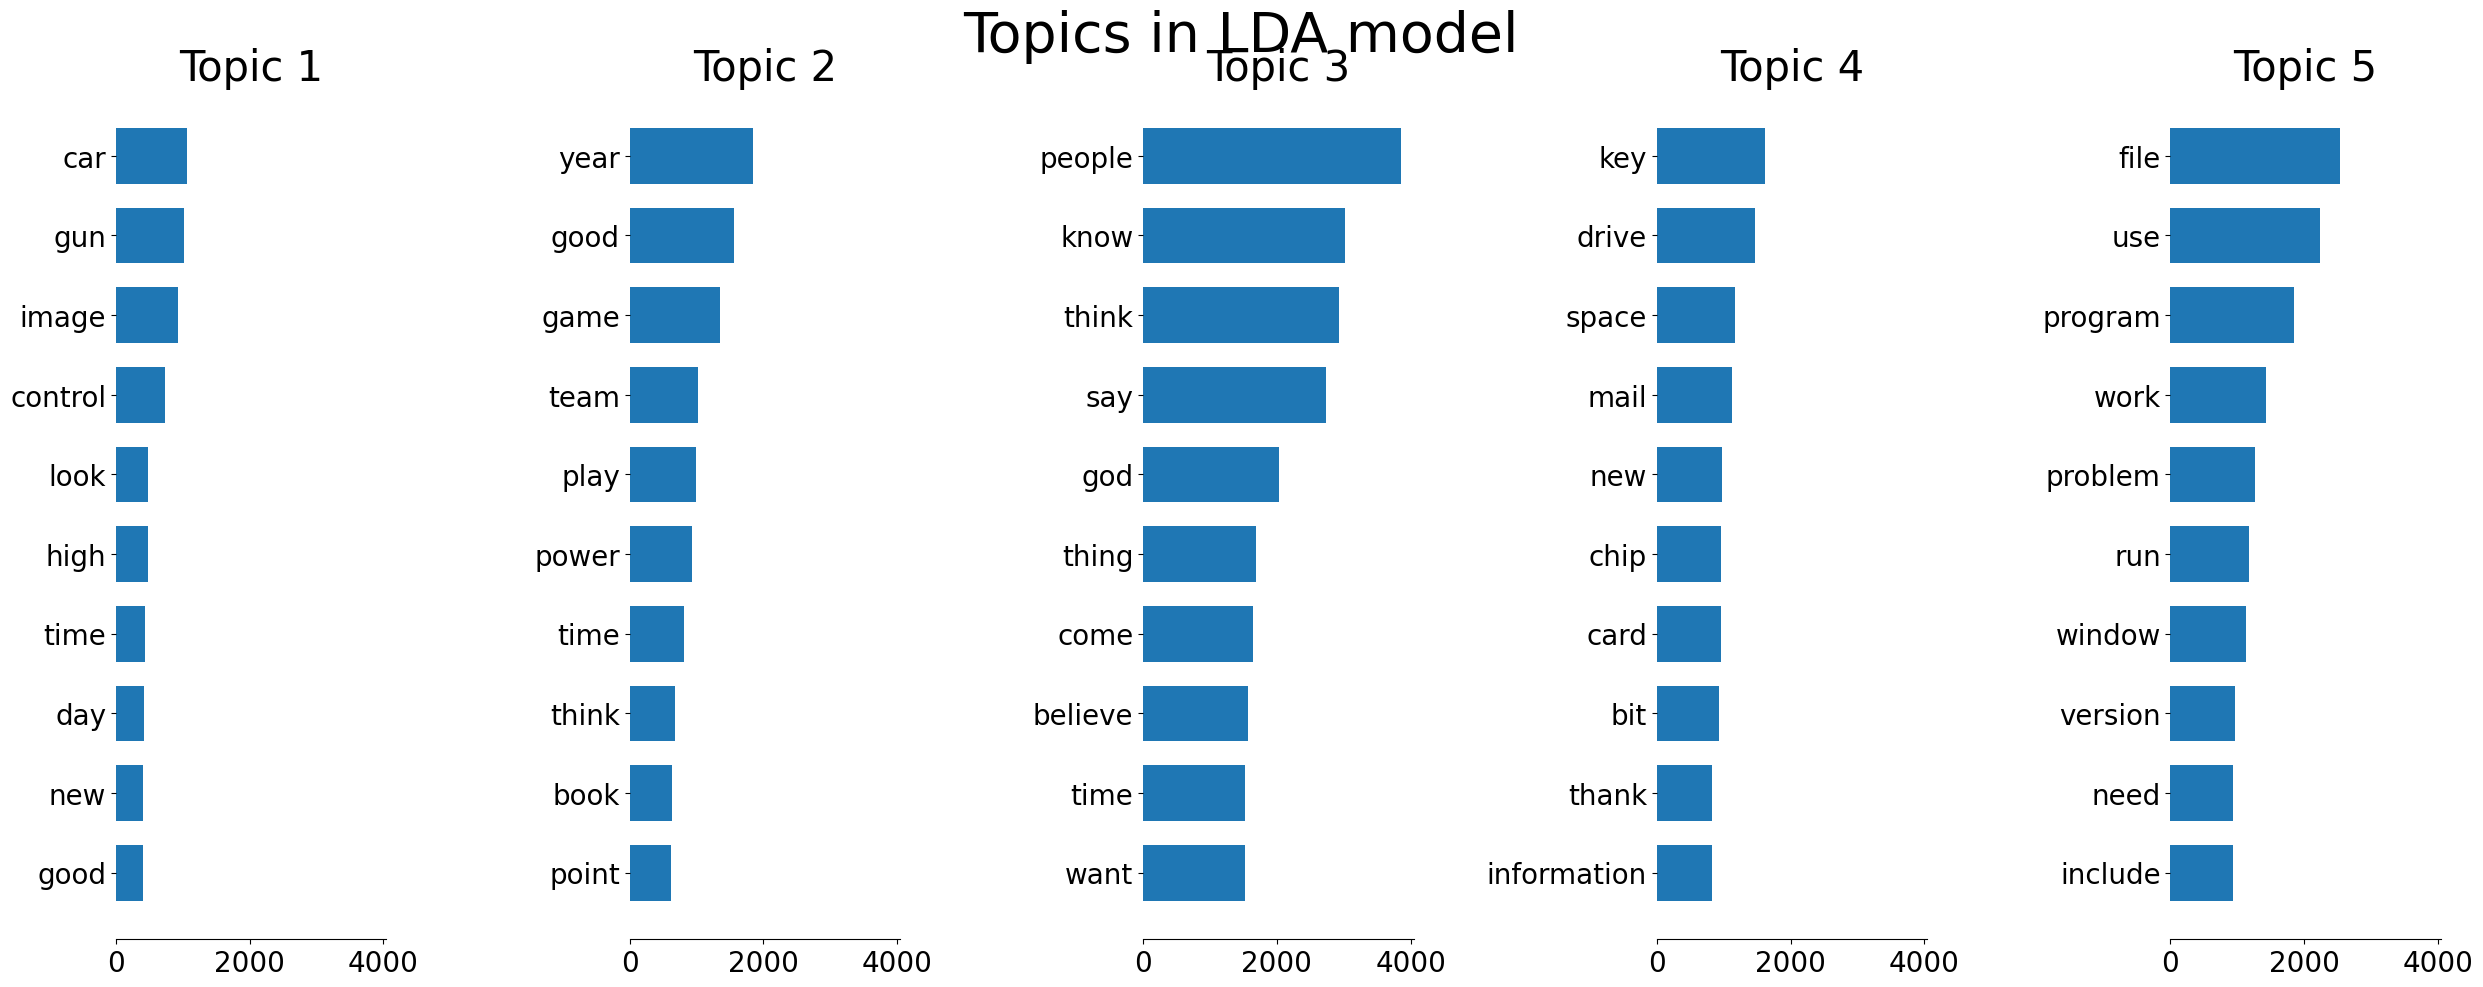

In [31]:
plot_top_words(lda, vectorizer.get_feature_names_out(), 10, 'Topics in LDA model')

### Stretch: Use LDA w/ Gensim to do the same thing.